* interval -> ms

# Import Libraries

In [5]:
import pandas as pd

# POLO

### A

In [6]:
polo_a = pd.read_csv("./data/A/POLO_A_2025-01-31T17_59_47.140697Z-debug.csv")

polo_a.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345800735,speed,0.0,335,1,1,0
1,1738345801078,rpm,983.0,140,2,2,0
2,1738345801218,engine_load,13.0,152,3,3,0
3,1738345801370,engine_oil_temperature,NO DATA\r>,116,4,4,1
4,1738345801486,coolant_temp,87.0,90,5,5,1


<Axes: ylabel='Frequency'>

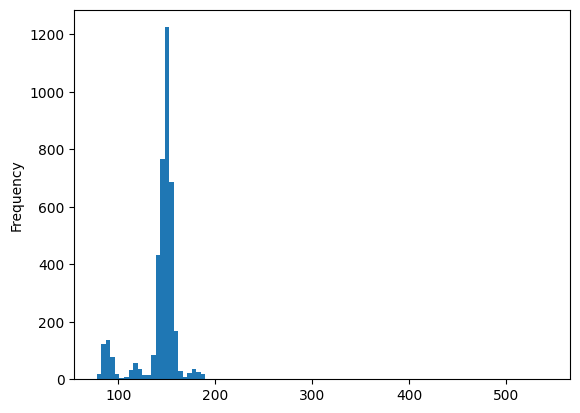

In [15]:
polo_a["Interval"].plot(kind="hist", bins=100)

### B

In [7]:
polo_b = pd.read_csv("./data/B/POLO_B_2025-01-31T17_48_22.461519Z-debug.csv")

polo_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345088711,speed,0.0,309,1,1,0
1,1738345088711,speed,0.0,323,1,2,0
2,1738345089034,rpm,981.0,162,2,4,0
3,1738345089034,rpm,981.0,169,2,5,0
4,1738345089240,engine_load,16.0,185,3,7,0


<Axes: ylabel='Frequency'>

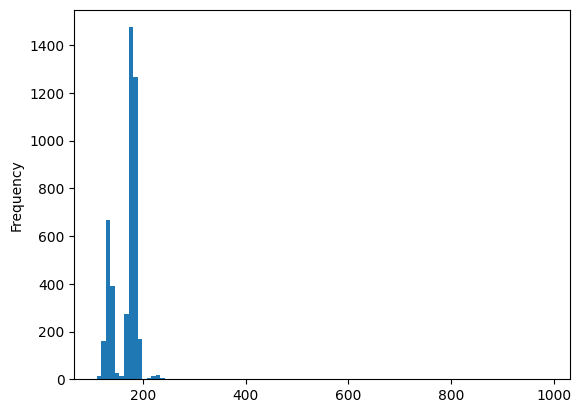

In [16]:
polo_b["Interval"].plot(kind="hist", bins=100)

# FIT

### A

In [8]:
fit_a = pd.read_csv("./data/A/FIT_A_2025-01-31T17_48_23.509583Z-debug.csv")

fit_a.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345053621,speed,0.0,453,1,1,0
1,1738345054075,rpm,738.0,148,2,2,0
2,1738345054223,engine_load,22.0,151,3,3,0
3,1738345054375,engine_oil_temperature,NO DATA\r>,117,4,4,1
4,1738345054492,coolant_temp,81.0,90,5,5,1


<Axes: ylabel='Frequency'>

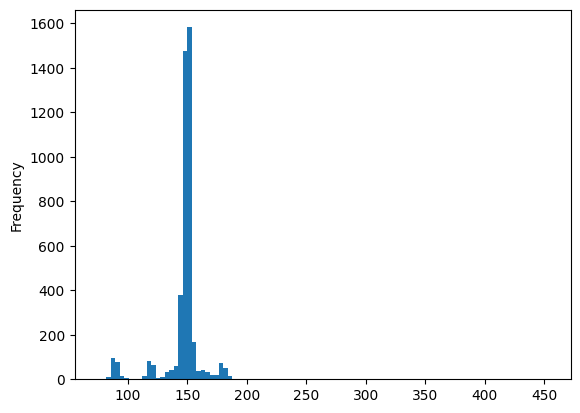

In [17]:
fit_a["Interval"].plot(kind="hist", bins=100)

### B

In [9]:
fit_b = pd.read_csv("./data/B/FIT_B_2025-01-31T18_00_37.690262Z-debug.csv")

fit_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738345789191,speed,0.0,152,1,1,0
1,1738345789374,rpm,762.0,119,2,3,0
2,1738345789523,engine_load,20.0,121,3,5,0
3,1738345789674,engine_oil_temperature,NO DATA,123,4,7,1
4,1738345789800,coolant_temp,88.0,110,5,9,1


<Axes: ylabel='Frequency'>

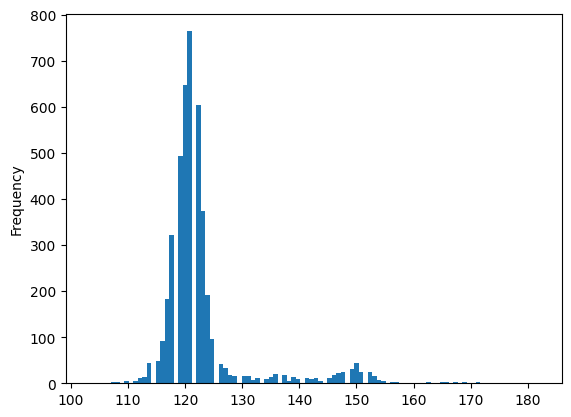

In [18]:
fit_b["Interval"].plot(kind="hist", bins=100)

# FASTBACK

### A

In [10]:
fastback_a = pd.read_csv("./data/A/FASTBACK_A_2025-01-31T18_25_37.743808Z-debug.csv")

fastback_a.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738347324917,speed,0.0,280,1,1,0
1,1738347325197,rpm,941.0,156,2,2,0
2,1738347325353,engine_load,40.0,143,3,3,0
3,1738347325497,engine_oil_temperature,127.0,150,4,4,0
4,1738347325647,coolant_temp,82.0,151,5,5,0


<Axes: ylabel='Frequency'>

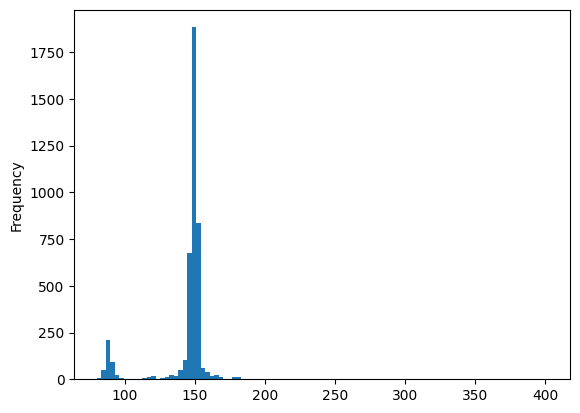

In [19]:
fastback_a["Interval"].plot(kind="hist", bins=100)

### B

In [11]:
fastback_b = pd.read_csv("./data/B/FASTBACK_B_2025-01-31T18_13_34.480439Z-debug.csv")

fastback_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738346625814,speed,0.0,173,1,1,0
1,1738346625814,speed,0.0,173,1,2,0
2,1738346626015,rpm,1008.0,153,2,4,0
3,1738346626015,rpm,1008.0,153,2,5,0
4,1738346626195,engine_load,47.0,154,3,7,0


In [21]:
fastback_b = fastback_b.iloc[0::2]

fastback_b

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738346625814,speed,0.0,173,1,1,0
2,1738346626015,rpm,1008.0,153,2,4,0
4,1738346626195,engine_load,47.0,154,3,7,0
6,1738346626375,engine_oil_temperature,96.0,153,4,10,0
8,1738346626530,coolant_temp,53.0,148,5,13,0
...,...,...,...,...,...,...,...
4638,1738347213148,timing_advance,-13.0,151,3794,8432,564
4640,1738347213450,distance_traveled_with_MIL_on,0.0,147,3796,8436,564
4642,1738347213627,intake_air_temperature,47.0,150,3797,8439,564
4644,1738347213931,relative_throttle_pos,9.0,147,3799,8443,564


<Axes: ylabel='Frequency'>

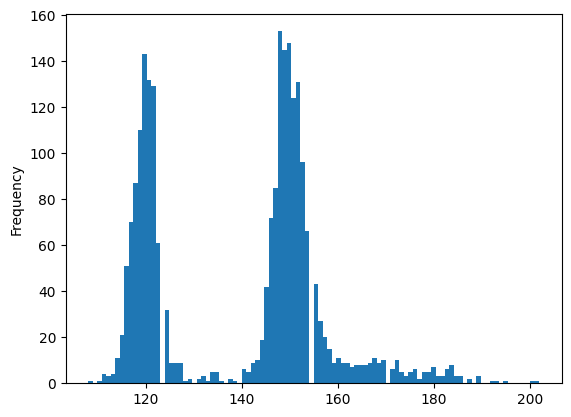

In [22]:
fastback_b["Interval"].plot(kind="hist", bins=100)

# TCROSS

### A

In [12]:
tcross_a = pd.read_csv("./data/A/TCROSS_A_2025-01-31T18_13_48.052103Z-debug.csv")

tcross_a.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738346588337,fuel_pressure,NO DATA\r>,492,200,199,45
1,1738346588829,fuel_rail_pressure,NO DATA\r>,151,201,200,46
2,1738346588980,fuel_rail_gauge_pressure,NO DATA\r>,150,202,201,47
3,1738346589130,intake_manifold_absolut_pressure,65.0,149,203,202,47
4,1738346589279,timing_advance,-9.0,151,204,203,47


### B

In [13]:
tcross_b = pd.read_csv("./data/B/TCROSS_B_2025-01-31T18_25_15.916263Z-debug.csv")

tcross_b.head()

,Timestamp,CommandSent,Response,Interval,CommandsCount,ResponsesCount,Failed
0,1738347287369,speed,0.0,206,1,1,0
1,1738347287369,speed,0.0,207,1,2,0
2,1738347287620,rpm,982.0,180,2,4,0
3,1738347287620,rpm,982.0,180,2,5,0
4,1738347287801,engine_load,15.0,180,3,7,0
